# Equipo 2

##Proyecto Integrador- Avance 5

# ***Alumnos:***

## David Moisés Alfandari Martínez - A01794577

## Fernando García Corona          - A01793717

## Jesús Elías Ruiz Montoya         - A01794485

------------------------------------------------------
# Avance 1. Análisis exploratorio de datos
------------------------------------------------------
Análisis exploratorio de datos.

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Montar Google Drive para cargar los datos.
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Importar librerías necesarias.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import numpy as np

In [ ]:
# Cargar el archivo CSV.
df = pd.read_csv('/content/drive/MyDrive/Proyecto Integrador/NewVehicleFillData.csv')

### Información general del DataFrame

In [ ]:
df.head()

,Machine,Timestamp,VIN,ROT,Machine ID,Cycle Result,Failed on Field,Actual Style Cycled,EPS Style Selected,Machine Cycle Status,...,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29
0,Ch2 Rad Fill Online Backup,06/07/2024 04:14,NaN,0,615,FAIL,NaN,4,4,MANUAL ABORT/STOP,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Ch2 Rad Fill Online Backup,06/07/2024 04:15,NaN,0,615,FAIL,NaN,4,4,MANUAL ABORT/STOP,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Ch2 Rad Fill Online Backup,08/07/2024 07:22,1FMJU1L80REA66706,2515,615,PASS,NaN,1,1,CYCLE ACCEPT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Ch2 Rad Fill Online Backup,08/07/2024 07:41,NaN,0,615,FAIL,NaN,5,5,MANUAL ABORT/STOP,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Ch2 Rad Fill Online Backup,08/07/2024 07:41,NaN,0,615,FAIL,NaN,5,5,MANUAL ABORT/STOP,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Exploración general del DataFrame.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74201 entries, 0 to 74200
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Machine                 74201 non-null  object 
 1   Timestamp               74201 non-null  object 
 2   VIN                     73685 non-null  object 
 3   ROT                     74201 non-null  int64  
 4   Machine ID              74201 non-null  int64  
 5   Cycle Result            74201 non-null  object 
 6   Failed on Field         38678 non-null  object 
 7   Actual Style Cycled     74201 non-null  object 
 8   EPS Style Selected      74201 non-null  object 
 9   Machine Cycle Status    74201 non-null  object 
 10  Adapter #               74201 non-null  int64  
 11  Cycle Time              74201 non-null  float64
 12  Vacuum                  74201 non-null  int64  
 13  Pressure                74201 non-null  float64
 14  Volume                  74201 non-null

### Limpieza del dataset

In [ ]:
# Eliminamos las columnas 1,2, 4, 5,19 a la 30 ya que no agregan valores útiles al análisis
df.drop(df.columns[17:30], axis=1, inplace=True)
df.drop(df.columns[[0,1,2,3,4]], axis=1, inplace=True)
df.head()

,Cycle Result,Failed on Field,Actual Style Cycled,EPS Style Selected,Machine Cycle Status,Adapter #,Cycle Time,Vacuum,Pressure,Volume,Pressure Decay,Flowback Volume
0,FAIL,NaN,4,4,MANUAL ABORT/STOP,0,4.63,209,0.0,0.00,0.0,0.0
1,FAIL,NaN,4,4,MANUAL ABORT/STOP,0,25.05,209,0.0,0.00,0.0,0.0
2,PASS,NaN,1,1,CYCLE ACCEPT,0,73.34,5,20.4,16.92,0.5,3.0
3,FAIL,NaN,5,5,MANUAL ABORT/STOP,0,2.76,209,0.0,0.00,0.0,0.0
4,FAIL,NaN,5,5,MANUAL ABORT/STOP,0,6.81,209,0.0,0.00,0.0,0.0


Se identifica la columna Failed on Field como la variable objetivo del dataset, porque ahí se indican las unidades que han fallado en campo y que pasaron el proceso de planta. Se hace el reemplazo de NaN por No, para indicar que esas "no fallaron en campo", las que fallaron ya cuentan con la etiqueta "YES". Posteriormente de hace la binarizacion.

In [ ]:
# Convertimos a int (1 | 0) los valores de las variables Failed on Field y Cycle Result
df['Failed on Field'].replace(np.nan, 'No', inplace=True)
df['Failed on Field'] = df['Failed on Field'].apply(lambda x: 1 if x == 'Yes' else 0)

df['Cycle Result'] = df['Cycle Result'].apply(lambda x: 1 if x == 'PASS' else 0)

In [ ]:
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = df.select_dtypes(include=['object', 'category']).columns

In [ ]:
df.isnull().sum()

,0
Cycle Result,0
Failed on Field,0
Actual Style Cycled,0
EPS Style Selected,0
Machine Cycle Status,0
Adapter #,0
Cycle Time,0
Vacuum,0
Pressure,0
Volume,0


In [ ]:
### ¿Cuáles son las estadísticas resumidas del conjunto de datos?

Se establecen las estadísitcas de las columnas numéricas de todas las variables del dataframe.

In [ ]:
# Estadísticas resumidas del conjunto de datos numéricos mediante la transpuesta para una facilitar la lectura.
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Cycle Result,74201.0,0.963882,0.186585,0.0,1.00,1.00,1.00,1.00
Failed on Field,74201.0,0.004919,0.069964,0.0,0.00,0.00,0.00,1.00
Adapter #,74201.0,0.962372,0.194151,0.0,1.00,1.00,1.00,8.00
Cycle Time,74201.0,79.495457,11.338630,0.0,74.69,80.51,85.92,177.54
Vacuum,74201.0,15.083638,33.493399,0.0,10.00,12.00,14.00,954.00
Pressure,74201.0,23.771724,4.435234,0.0,22.70,24.30,25.60,29.90
Volume,74201.0,26.038605,7.264479,0.0,22.25,25.24,32.38,38.37
Pressure Decay,74201.0,0.976104,0.561037,-1.1,0.70,0.90,1.20,15.00
Flowback Volume,74201.0,2.723595,2.939119,-100.0,2.20,2.40,2.80,100.00


Se establecen las descripción de las columnas de todas las variables categóricas del dataframe.

In [ ]:
df.describe(include = 'object').T

,count,unique,top,freq
Actual Style Cycled,74201,16,1,13583
EPS Style Selected,74201,12,1,13691
Machine Cycle Status,74201,20,CYCLE ACCEPT,71405


In [ ]:
# Agregar cuenta de valores válidos para cada columna.
valid_counts = df.count()
print("Valid counts:")
print(valid_counts)

Valid counts:
Cycle Result            74201
Failed on Field         74201
Actual Style Cycled     74201
EPS Style Selected      74201
Machine Cycle Status    74201
Adapter #               74201
Cycle Time              74201
Vacuum                  74201
Pressure                74201
Volume                  74201
Pressure Decay          74201
Flowback Volume         74201
dtype: int64


In [ ]:
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = df.select_dtypes(include=['object', 'category']).columns

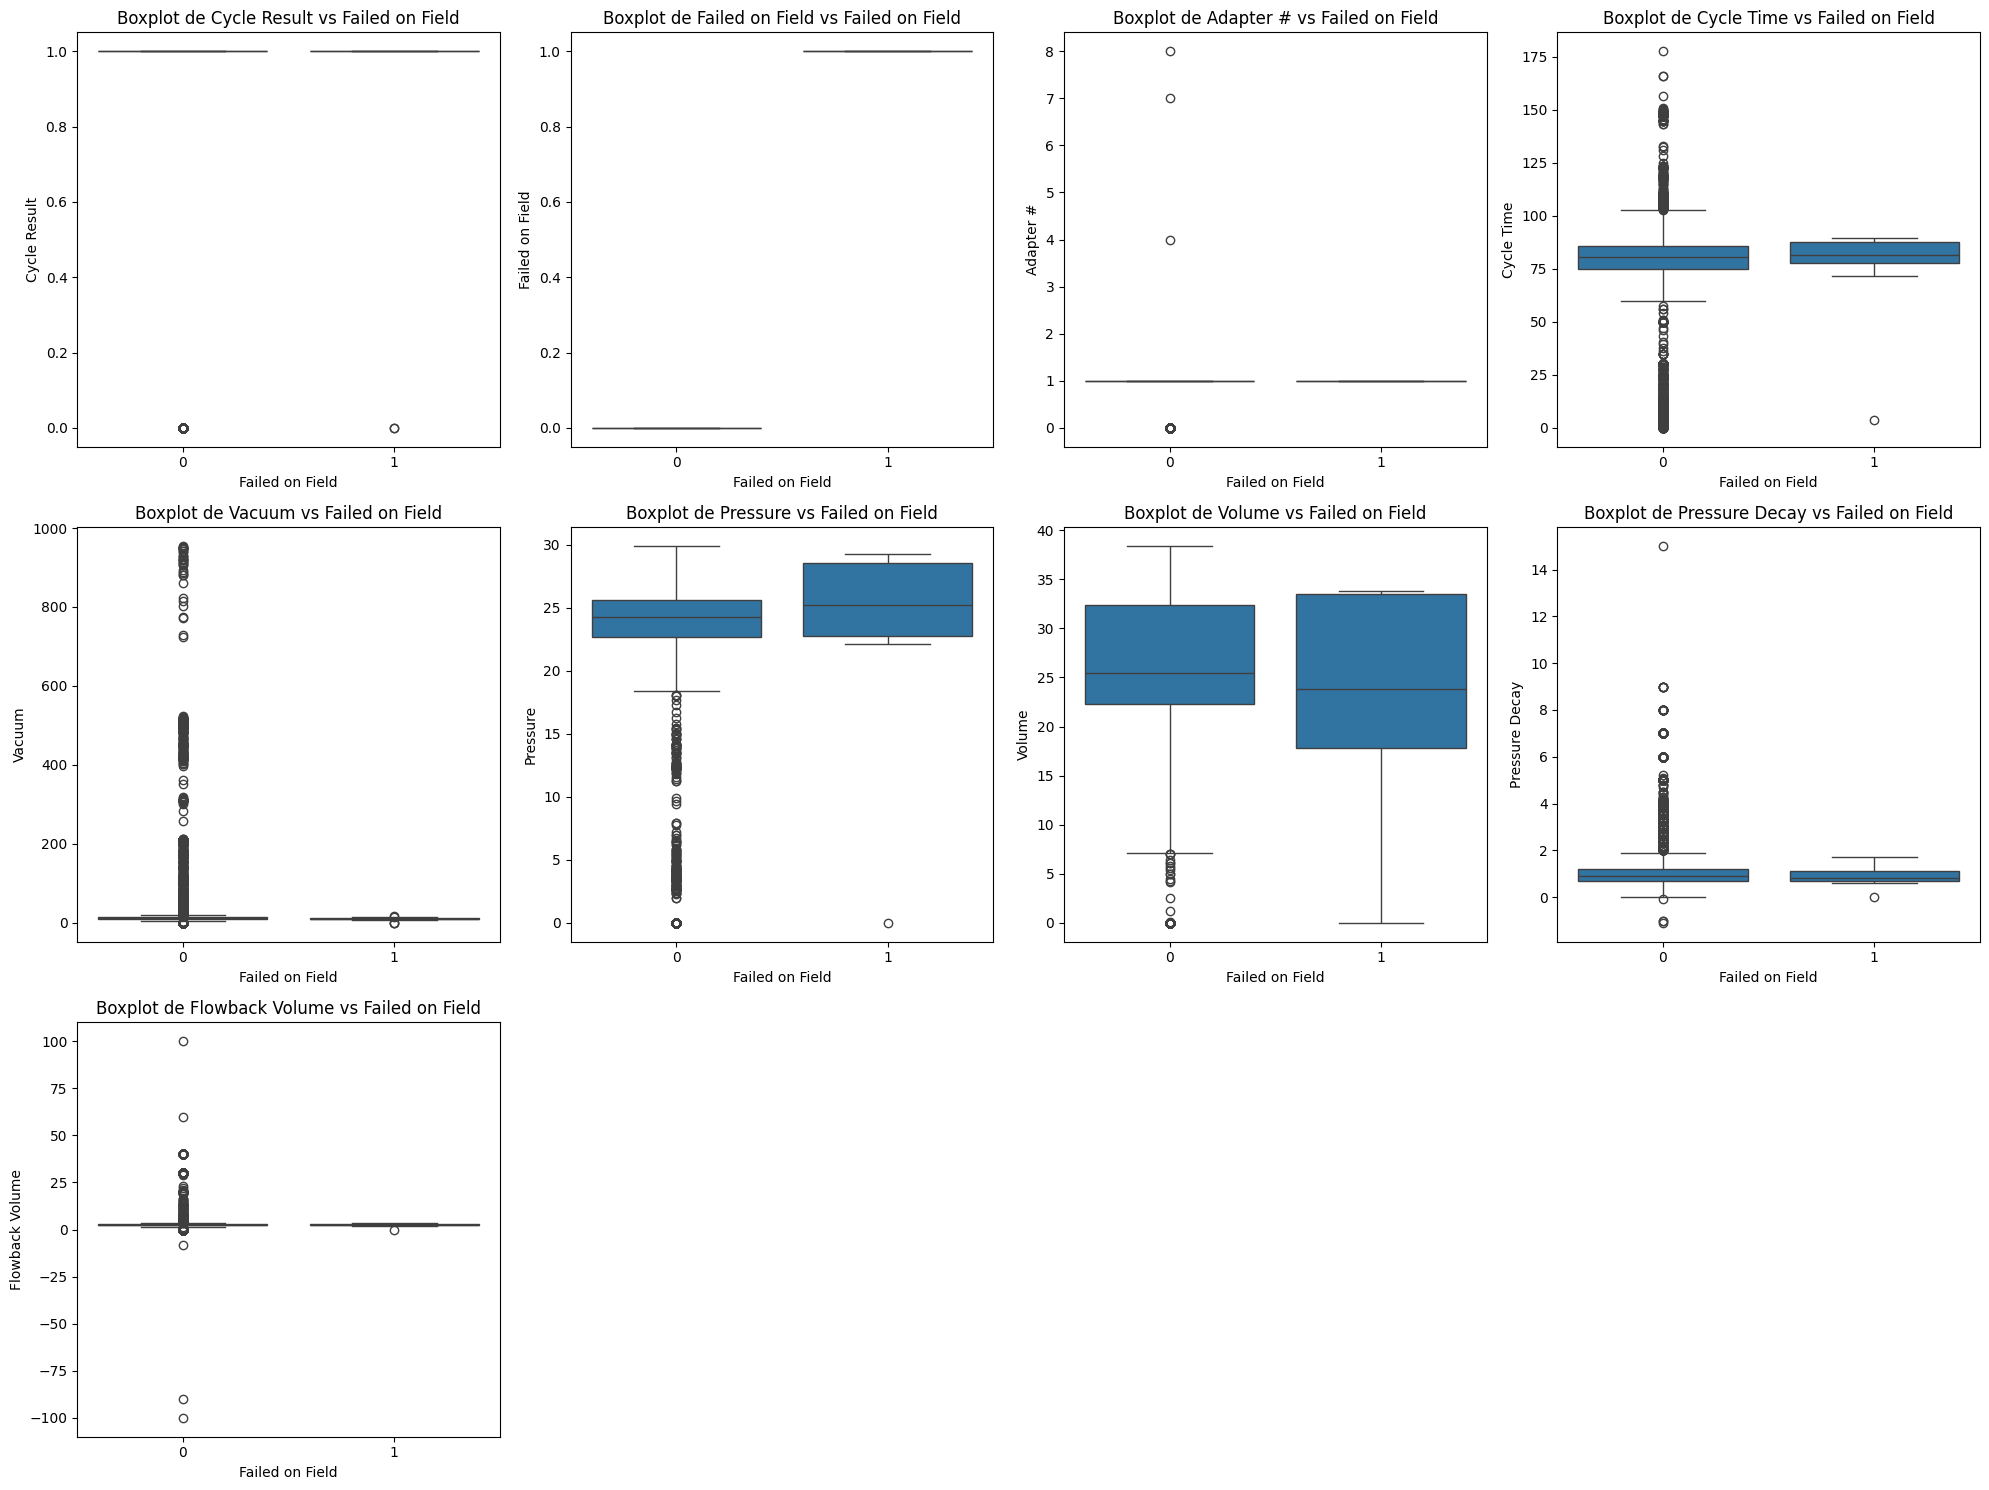

In [ ]:
import math

# Variables numéricas.
numerical_columns = df.select_dtypes(include=[np.number]).columns

# Configurar la cuadrícula.
n_cols = 4  # Número de columnas.
n_rows = math.ceil(len(numerical_columns) / n_cols)  # Número de filas basado en el total de variables.
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 15))  # Ajustar el tamaño de la figura.

# Aplanar los ejes (en caso de que haya más de una fila/columna).
axes = axes.flatten()

# Crear los boxplots en cada posición de la cuadrícula.
for i, col in enumerate(numerical_columns):
    sns.boxplot(x='Failed on Field', y=col, data=df, ax=axes[i])
    axes[i].set_title(f'Boxplot de {col} vs Failed on Field')

# Eliminar gráficos en blanco (si hay menos variables que subplots disponibles).
for i in range(len(numerical_columns), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()  # Ajustar los espacios entre los subplots.
plt.show()

### ¿Hay valores atípicos en el conjunto de datos?

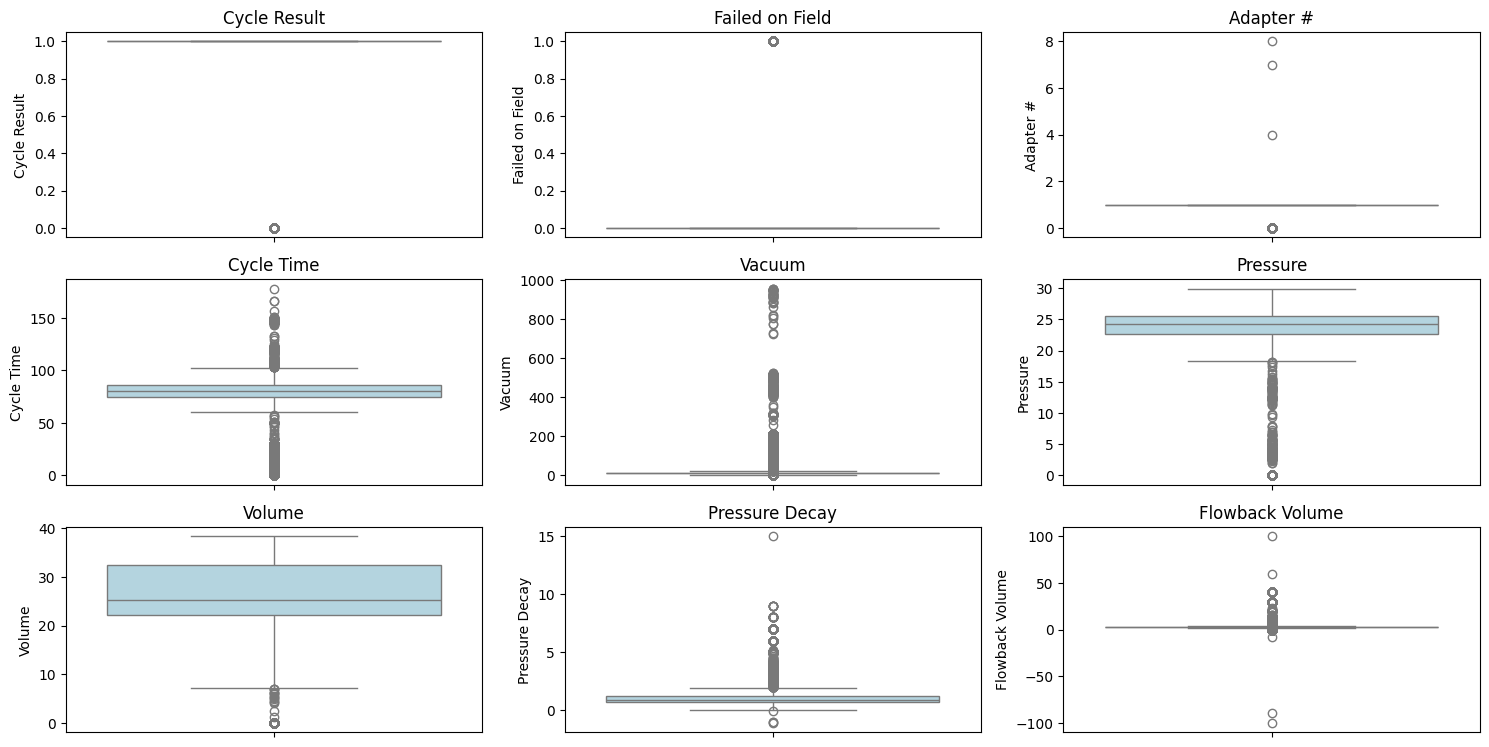

In [ ]:
# Boxplots para detectar valores atípicos.

plt.figure(figsize=(15, 10))

rows = (len(numerical_cols) // 3) + 1  # Aseguramos que hay suficientes posiciones para los subplots.
for i, col in enumerate(numerical_cols, 1): # Iterar solo sobre las columnas válidas.
    plt.subplot(rows, 3, i) # Posicionar los subplots correctamente.
    sns.boxplot(data=df[col], color='lightblue')
    plt.title(f'{col}', fontsize=12)

plt.tight_layout()
plt.show()

### ¿Existen distribuciones sesgadas en el conjunto de datos? ¿Necesitamos aplicar alguna transformación no lineal?

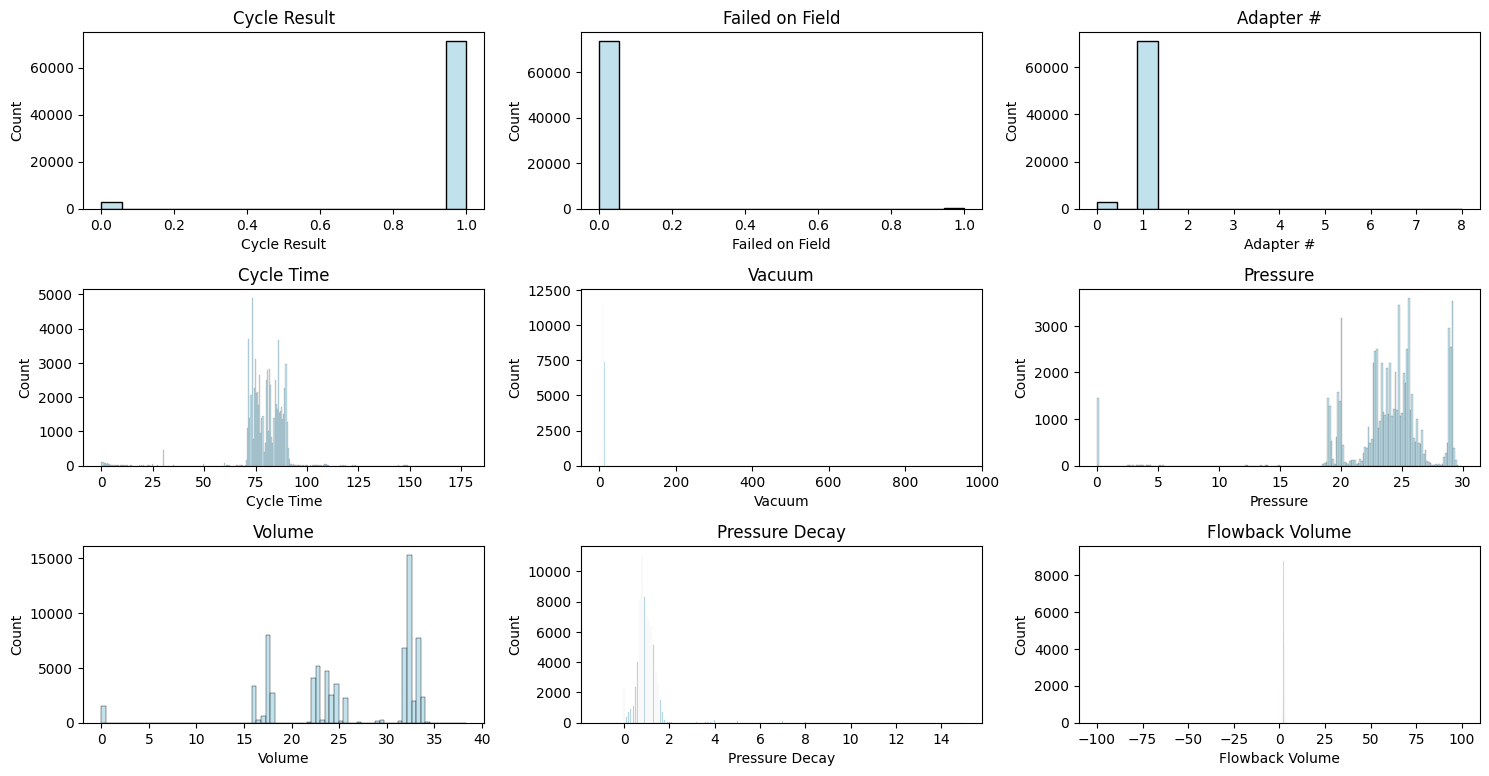

In [ ]:
# Histogramas para revisar las distribuciones.
plt.figure(figsize=(15, 10))

rows = (len(numerical_cols) // 3) + 1
for i, col in enumerate(df[numerical_cols], 1):
    plt.subplot(rows, 3, i)
    sns.histplot(df[col], color='lightblue')
    plt.title(f'{col}', fontsize=12)

plt.tight_layout()
plt.show()

### ¿Hay valores faltantes en el conjunto de datos? ¿Se pueden identificar patrones de ausencia?

In [ ]:
df[numerical_cols].isnull().sum()

,0
Cycle Result,0
Failed on Field,0
Adapter #,0
Cycle Time,0
Vacuum,0
Pressure,0
Volume,0
Pressure Decay,0
Flowback Volume,0


### ¿Hay correlación entre las variables dependientes e independientes?

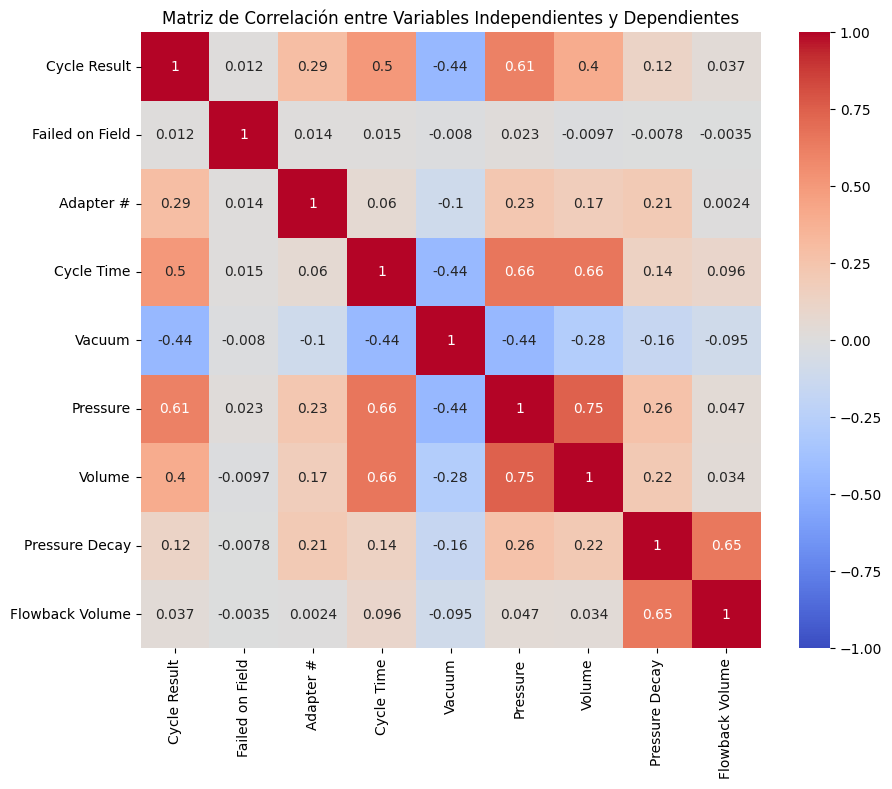

In [ ]:
correlation_matrix = df[numerical_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Matriz de Correlación entre Variables Independientes y Dependientes')
plt.show()

### ¿Cómo se distribuyen los datos en función de diferentes categorías?

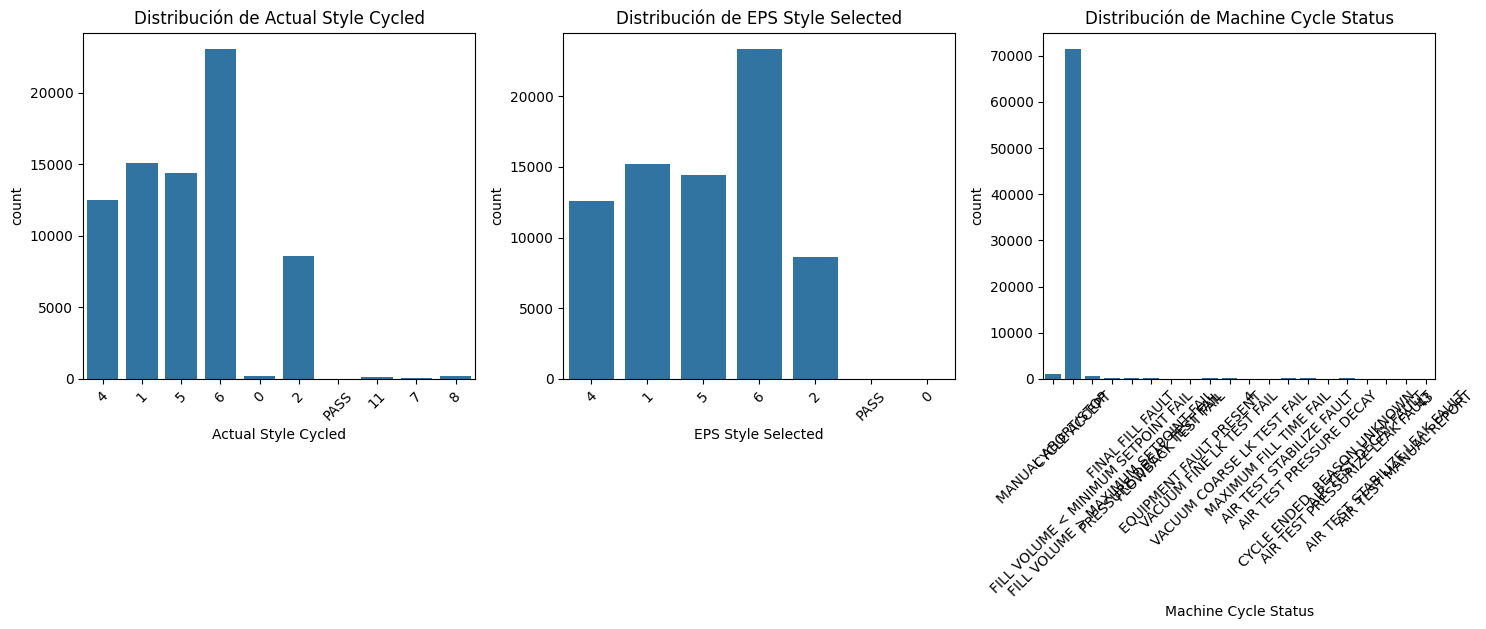

In [ ]:
# Visualización de la distribución de datos en función de diferentes categorías.
plt.figure(figsize=(15, 10))
rows = (len(categorical_cols) // 3) + 1

for i, col in enumerate(categorical_cols, 1):
    plt.subplot(rows, 3, i)
    sns.countplot(x=df[col], data=df)
    plt.title(f'Distribución de {col}', fontsize=12)
    plt.xticks(rotation=45)  # Rotación de los nombres de las categorías.

plt.tight_layout()
plt.show()

# Conclusiones
## Calidad y estructura de los datos
Es importante verificar si existen valores nulos en las variables numéricas del conjunto de datos que puedan impactar el análisis de exploración inicial y que posteriormente, podría impedir el proceso de agrupamiento o 'clustering'. Con el objetivo de mantener la fluidez y la integridad del análisis incluso con bases de datos postriores, fue necesario imputar dichos valores nulos o eliminar las filas correspondientes.
Por otro lado, se realizó un análisis de las estadísticas descriptivas para obtener una visión general de las distribuciones y rangos de las variables. A partir de la observación de los gráficos identificamos la necesidad de transformaciones adicionales en un tratamiento posterior.

## Valores atípicos y distribuciones
Por medio de diagramas de caja o 'boxplots', identificamos la existencia de valores atípicos en algunas variables importantes como en el tiempo del ciclo de evacuación/llenado y el volumen de llenado. La existencia de estos valores a los extremos pueden estar teniendo injerencia en el proceso general y pueden estar influyendo en las incidencias de fallos observados. Consideramos importante compartir estas observaciones con el especialista para ponderar el potencial impacto de estas desviaciones en las distribuciones.

## Correlaciones
Por medio de la matriz de correlación entre variables independientes y dependientes observamos algunas relaciones de moderada preponderancia entre algunas variables como la presión y el tiempo del ciclo de llenado, a partir de las cuales podemos sugerir el uso de modelos supervizados para predecir las magnitudes adecuadas en variables de interés.

## Patrones de datos a partir del Clustering o agrupamiento
Se aplicó el algoritmo 'K-means' para la agrupación de muestras en función de la similitud entre sus características, y el análisis visual por medio de PCA indica que los datos pueden identificarse dentro de tres 'clusters' o grupos principales. Esto sugiere  diferentes grupos de máquinas o comportamientos durante los procesos de llenado. Los patrones pueden ser útiles para una posterior segmentación entre grupos de operación en las máquinas.

## Comentarios sobre el análisis posterior
La agrupación de datos con K-Means y su comparación contra la variable referencia 'Failed on Field' nos permitió identificar patrones dentro de los datos. El análisis PCA identifica ciertas características que pueden ser fundamentales para poder predecir los fallos en campo. Los gráficos de barras y boxplots nos dan una visión más clara de la distribución que tienen las variables categóricas y su relación con el objetivo. El análisis bivariado de variables numéricas (por ejemplo: 'Pressure' vs 'Failed on Field') exhibió diferencias significativas, lo cual puede ser un indicativo de problemas en el proceso de llenado de refrigerante. Revisaremos este punto interesante con el especialista.

------------------------------------------------------
# Avance 2. Ingeniería de características
------------------------------------------------------

In [ ]:
# Importación de las librerías adicionales para la ingeniería de características, manejo de las variables categóricas y selección.
from sklearn.feature_selection import VarianceThreshold, SelectKBest, chi2
from sklearn.preprocessing import OneHotEncoder, KBinsDiscretizer
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer

### Codificación 'One-Hot'

Codificación 'One-Hot' para convertir las variables categóricas en un formato utilizable por los modelos de aprendizaje automático que requieren variables numéricas. Mediante la opción drop='first' se evita la multicolinealidad removiendo una de las categorías.
*Este paso parece redundante, pero se tuvo que realizar para poder ejecutar los pasos siguientes.*

In [ ]:
# Codificación One-Hot para las variables categóricas. Conversión de las variables categóricas en variables 'dummies' para su interpretación en los modelos de ML.
df[categorical_cols] = df[categorical_cols].astype(str)
encoder = OneHotEncoder(drop='first', sparse_output=False)
encoded_categorical = encoder.fit_transform(df[categorical_cols])

In [ ]:
encoded_categorical_df = pd.DataFrame(encoded_categorical, columns=encoder.get_feature_names_out(categorical_cols))

In [ ]:
df = df.drop(columns=categorical_cols)  # Eliminar las columnas originales
df = pd.concat([df, encoded_categorical_df], axis=1)  # Añadir las columnas codificadas

 ***Duplicar dataset, para un posterior analisis sin transformaciones**

In [ ]:
df_clean = df.copy(deep=True)

Verificación de la existencia de las columnas categóricas originales, antes de cualquier eliminación que implique errores.

In [ ]:
# Verificación si las columnas categóricas están presentes antes de eliminarlas para prevenir errores al eliminar elementos que no existen en el DataFrame.
columns_to_drop = [col for col in categorical_cols if col in df_clean.columns]
columns_to_drop

[]

In [ ]:
# Actualiza la lista de columnas numéricas
print("Columnas numéricas actualizadas:", [col for col in numerical_cols if col in df_clean.columns])
numerical_cols = ['Cycle Result', 'Adapter #', 'Cycle Time', 'Vacuum', 'Pressure', 'Volume', 'Pressure Decay', 'Flowback Volume']

Columnas numéricas actualizadas: ['Cycle Result', 'Failed on Field', 'Adapter #', 'Cycle Time', 'Vacuum', 'Pressure', 'Volume', 'Pressure Decay', 'Flowback Volume']


In [ ]:
# Escalamiento o Estandarización de las características numéricas
scaler = StandardScaler()
df_clean[numerical_cols] = scaler.fit_transform(df_clean[numerical_cols])

### Normalización de las características
Este paso es importante para que las variables numéricas tengan una media de 0 y desviación estándar de 1; con lo cual se busca que todas las características tengan una preponderancia equivalente en el análisis. Se evitan las despropociones porque todas estarán a la misma escala.

Aplicación de transformación logarítmica y Box-Cox para características numéricas sesgadas mejorando así la estabilidad y el rendimiento del modelo.

In [ ]:
# Iterar sobre las columnas numéricas
for col in numerical_cols:

    # Asegurarse de que todos los valores sean estrictamente positivos
    if (df_clean[col] <= 0).any():
        df_clean[col] = df_clean[col] + abs(df_clean[col].min()) + 1

    # Aplicar la transformación Box-Cox
    pt = PowerTransformer(method='box-cox')

    # Reescribir la  columna para los valores transformados
    df_clean[f'{col}'] = pt.fit_transform(df_clean[[col]])

# Verificar las primeras filas para asegurarse de que las transformaciones se realizaron correctamente
df_clean.head()

,Cycle Result,Failed on Field,Adapter #,Cycle Time,Vacuum,Pressure,Volume,Pressure Decay,Flowback Volume,Actual Style Cycled_1,...,Machine Cycle Status_EQUIPMENT FAULT PRESENT,Machine Cycle Status_FILL VOLUME < MINIMUM SETPOINT FAIL,Machine Cycle Status_FILL VOLUME > MAXIMUM SETPOINT FAIL,Machine Cycle Status_FINAL FILL FAULT,Machine Cycle Status_FLOWBACK TEST FAIL,Machine Cycle Status_MANUAL ABORT/STOP,Machine Cycle Status_MAXIMUM FILL TIME FAIL,Machine Cycle Status_PRESSURE DECAY TEST FAIL,Machine Cycle Status_VACUUM COARSE LK TEST FAIL,Machine Cycle Status_VACUUM FINE LK TEST FAIL
0,-5.165940,0,-4.38468,-4.199827,4.393354,-3.002449,-2.341110,-2.969450,-0.957732,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,-5.165940,0,-4.38468,-3.789586,4.393354,-3.002449,-2.341110,-2.969450,-0.957732,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.193576,0,-4.38468,-0.736590,-2.553467,-1.105299,-1.316531,-1.089058,0.104598,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-5.165940,0,-4.38468,-4.217212,4.393354,-3.002449,-2.341110,-2.969450,-0.957732,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,-5.165940,0,-4.38468,-4.175739,4.393354,-3.002449,-2.341110,-2.969450,-0.957732,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


##Conclusiones del avance 2##

La ingeniería y selección de características nos ha permitido transformar el conjunto de datos original en una versión más estructurada que favorezca el análisis. La creación de nuevas variables a partir de interacciones (como 'Vacuum' con 'Pressure'), nos permite conocer relaciones que en primera instancia no son evidentes con las variables originales; aumentando así, la capacidad de predicción del modelo con mayor precisión. Se seleccionó esta combinación debido a la relevancia que tienen estos dos parámetros en el proceso, así como punto de partida para evaluar su relevancia y resultados con el especialista. Es importante mencionar que el siguiente miércoles, se tendrá la revisión con él y potencialmente la decisiones tomadas en esta entrega serán modificadas. Los potenciales cambios o las sugerencias recibidas se abordarán con detalle en la siguiente entrega.

Por otro lado, se realizó la eliminación de características con baja varianza, las cuales pueden desviar la eficiencia del modelo al considerar información irrelevante y ocasionando futuros problemas durante el entrenamiento. Centrarse en la variables que tienen verdadera influencia sobre el parámetro objetivo (salida) mejora la capacidad de interpretación y la identificación de patrones.

Asimismo, la codificación 'One-Hot' de las variables categóricas permite un procesamiento numérico de los atributos cualitativos para un procesamiento adecuado de los algoritmos de aprendizaje automático, además se consideró ésta debido a su flexibilidad para aplicarla a una gamma amplia de variables categóricas con independencia al número de éstas. Auando a esto, la eliminación de colinealidad evita problemas asociados a la estimación de los coeficientes.


En suma, esta serie de pasos críticos en el análisis de información, nos permite contar con un conjunto de datos optimizado, robusto y relevante al momento, con base a las definiciones iniciales de valores críticos, que independientemente si se alterán o no, sentarán as bases para que los modelos subsecuentes sean más eficientes al tener menores tiempos de entrenamiento y mejor capacidad predictiva. Con esto, se podrán comparar diferentes algoritmos (regresión logística, árbol de decisión, máquinas de soporte vectorial, entre otras) para determinar con cuál podremos tener mejor rendimiento con base en distintas métricas seleccionando el modelo más adecuado para nuestro objetivo final.

------------------------------------------------------
# Avance 3. Baseline
------------------------------------------------------

### Balanceo de clases

<Axes: xlabel='Failed on Field', ylabel='count'>

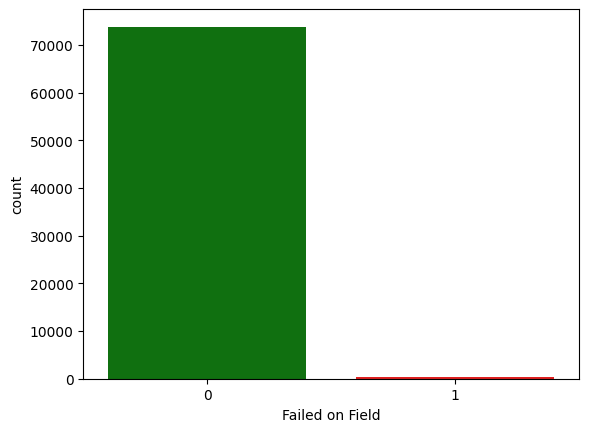

In [ ]:
# Desequilibrio en la variable objetivo 'Failed on Field'.
sns.countplot(x='Failed on Field', data=df_clean, palette=['green', 'red'])

In [ ]:
pip install imbalanced-learn

In [ ]:
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTEENN, SMOTETomek

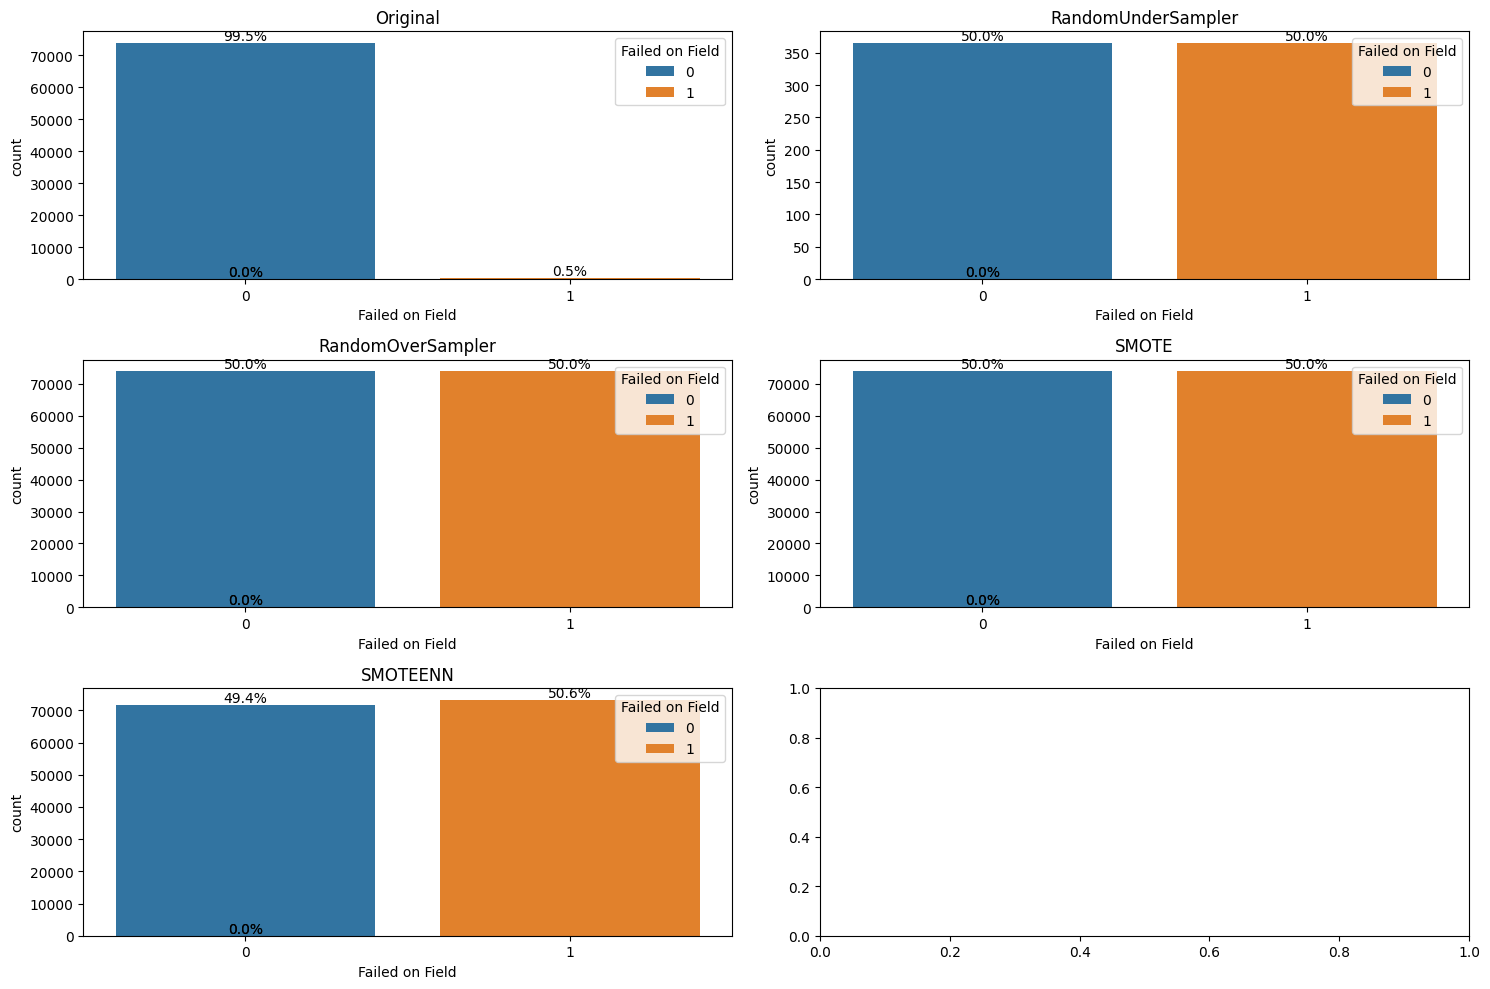

In [ ]:
# Probar modelos de balanceo
models = [
    ('Original', df_clean),
    ('RandomUnderSampler', RandomUnderSampler(sampling_strategy='auto')),
    ('RandomOverSampler', RandomOverSampler(sampling_strategy='auto')),
    ('SMOTE', SMOTE(sampling_strategy='auto')),
    ('SMOTEENN', SMOTEENN(sampling_strategy='auto')),
]

fig, ax = plt.subplots(3, 2, figsize=(15, 10))
ax = ax.ravel()

for i, (name, model) in enumerate(models):
    if name == 'Original':
        data = df_clean
    else:
        data = df_clean.copy()

        # fit the model
        Xr, yr = model.fit_resample(data.drop(columns='Failed on Field'), data['Failed on Field'])
        data = pd.concat([Xr, yr], axis=1)

    sns.countplot(data=data, x='Failed on Field', ax=ax[i], hue='Failed on Field')
    # annotate percentage
    total = len(data)
    for p in ax[i].patches:
        percentage = '{:.1f}%'.format(100 * p.get_height() / total)
        x = p.get_x() + p.get_width() / 2
        y = p.get_height()
        ax[i].annotate(percentage, (x, y), ha='center', va='bottom')
    ax[i].set_title(name)

plt.tight_layout()
plt.show()

In [ ]:
# Balancear las clases usando SMOTE
X = df_clean
X = X.drop(['Failed on Field'], axis=1)
y = df_clean['Failed on Field']


# Dividir el dataset en entrenamiento y prueba (opcional)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#Aplicar SMOTE
ros = SMOTE(sampling_strategy='auto')
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)

# Convertir a DataFrame de pandas
df_clean = pd.DataFrame(X_resampled, columns=X.columns)
df_clean['Failed on Field'] = y_resampled

<Axes: xlabel='Failed on Field', ylabel='count'>

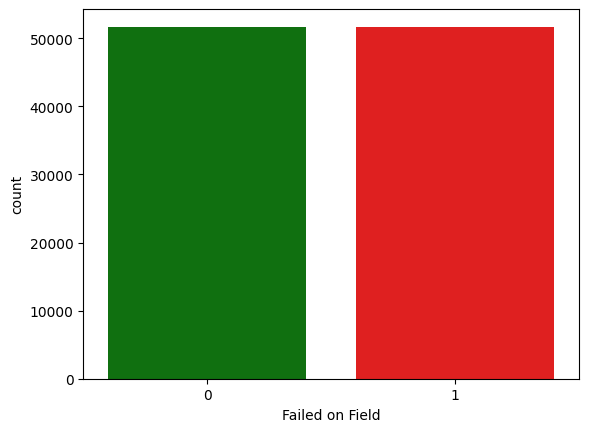

In [ ]:
# Comprobación de desequilibrio en la variable objetivo 'Failed on Field'.
sns.countplot(x='Failed on Field', data=df_clean, palette=['green', 'red'])

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import recall_score, classification_report, confusion_matrix

### ¿Qué algoritmo (individual, NO ensambles) se puede utilizar como baseline para predecir las variables objetivo?

Regresión Logística es un modelo lineal ampliamente utilizado para problemas de clasificación binaria, lo que lo convierte en una buena opción como baseline.


In [ ]:
X = df_clean
X = X.drop(['Failed on Field'], axis=1)
y = df_clean[['Failed on Field']]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Instanciar el modelo de regresión lineal
model = LogisticRegression()

# Entrenar el modelo
model.fit(X_train, y_train)

# Predecir en el conjunto de prueba
y_pred = model.predict(X_test)

# Calcular el recall
recall = recall_score(y_test, y_pred)
print(f'Recall: {recall:.2f}')

# Mostrar el reporte de clasificación
print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred))

# Matriz de confusión
print("\nMatriz de confusión:")
print(confusion_matrix(y_test, y_pred))

Recall: 0.81

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.80      0.73      0.77     15535
           1       0.75      0.81      0.78     15476

    accuracy                           0.77     31011
   macro avg       0.78      0.77      0.77     31011
weighted avg       0.78      0.77      0.77     31011


Matriz de confusión:
[[11406  4129]
 [ 2875 12601]]


# Repetir el proceso pero con los datos sin procesar

In [ ]:
# Balancear las clases usando SMOTE
X_RAW = df
X_RAW = X_RAW.drop(['Failed on Field'], axis=1)
y_RAW = df['Failed on Field']


# Dividir el dataset en entrenamiento y prueba (opcional)
X_train_RAW, X_test_RAW, y_train_RAW, y_test_RAW = train_test_split(X_RAW, y_RAW, test_size=0.3, random_state=42)

#Aplicar SMOTE
ros = SMOTE(sampling_strategy='auto')
X_resampled_RAW, y_resampled_RAW = ros.fit_resample(X_train_RAW, y_train_RAW)

# Convertir a DataFrame de pandas
df = pd.DataFrame(X_resampled_RAW, columns=X_RAW.columns)
df['Failed on Field'] = y_resampled_RAW



X_train_RAW, X_test_RAW, y_train_RAW, y_test_RAW = train_test_split(X_RAW, y_RAW, test_size=0.3, random_state=42)

# Instanciar el modelo de regresión lineal
model = LogisticRegression()

# Entrenar el modelo
model.fit(X_train_RAW, y_train_RAW)

# Predecir en el conjunto de prueba
y_pred_RAW = model.predict(X_test_RAW)

# Calcular el recall
recall = recall_score(y_test_RAW, y_pred_RAW)
print(f'Recall: {recall:.2f}')

# Mostrar el reporte de clasificación
print("\nReporte de clasificación:")
print(classification_report(y_test_RAW, y_pred_RAW))

# Matriz de confusión
print("\nMatriz de confusión:")
print(confusion_matrix(y_test_RAW, y_pred_RAW))

Recall: 0.00

Reporte de clasificación:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     22152
           1       0.00      0.00      0.00       109

    accuracy                           1.00     22261
   macro avg       0.50      0.50      0.50     22261
weighted avg       0.99      1.00      0.99     22261


Matriz de confusión:
[[22152     0]
 [  109     0]]


### **\*Con el conjunto de datos si hacer las transformaciones, tenemos un modelos sobreajustado, por lo cual continuaremos usando los datos trasnformados.**

### ¿El modelo está sub/sobreajustando los datos de entrenamiento?

Por los resultados observados, el modelo parece estar en un punto de equilibrio razonable entre subajuste y sobreajuste, aunque la baja precisión en la clase "0" podría ser indicativa de cierto grado de subajuste.

### ¿Cuál es la métrica adecuada para este problema de negocio?
La métrica más relevante para este problema parece ser el recall, especialmente en la clase "1", si la prioridad es identificar eventos críticos (fallos, anomalías). A pesar de una precisión moderada, garantizar un alto recall en esta clase sería importante para reducir el riesgo de fallos no detectados.



## Conclusión


El modelo ha mostrado un rendimiento moderado, con una precisión y recall equilibrados en torno al 73%, lo que sugiere que realiza un trabajo aceptable en ambas clases, pero con margen para mejorar.

El modelo tiene una precisión general del 73%, lo que significa que predice correctamente tres de cada cuatro instancias.
El recall de la clase "1" (la clase positiva, asumiendo que se trata de fallos o eventos importantes) es relativamente alto, con un 83%, lo que indica que el modelo está capturando una buena proporción de los verdaderos positivos. Esto es importante si la clase "1" representa eventos críticos como fallos en el sistema o anomalías.
El recall para la clase "0" es más bajo, 64%, lo que indica que está clasificando incorrectamente una parte significativa de las instancias de la clase "0" como "1" (falsos positivos).

El modelo parece estar en un punto de compromiso entre la precisión y el recall en ambas clases, especialmente en la clase "0". Esto indica que, aunque el modelo es bastante bueno para detectar la clase "1", tiene dificultades con la clase "0", lo que puede resultar en muchos falsos positivos (instancias clasificadas incorrectamente como fallas cuando no lo son).

Clase 0 (normal): Hay una tasa alta de falsos positivos en esta clase. Aunque el modelo identifica correctamente una buena parte de las instancias de la clase "0", su rendimiento aquí es inferior al de la clase "1".
Clase 1 (fallo o evento crítico): El modelo tiene un rendimiento robusto, detectando el 84% de las instancias de esta clase, lo cual es adecuado si la clase "1" es crítica para el negocio.

Ajustar el Umbral de Decisión: Para mejorar el rendimiento en la detección de fallos (clase "1"), se puede ajustar el umbral de decisión del modelo, de forma que aumente el recall para la clase "1" a costa de una mayor tasa de falsos positivos.
Modelos más complejos como Random Forest, Gradient Boosting, o Support Vector Machines (SVM) podrían mejorar el rendimiento al capturar relaciones no lineales más complejas entre las variables.


------------------------------------------------------
# Avance 4. Modelos alternativos
------------------------------------------------------

Importamos las bibliotecas necesarias para la implementación de los modelos alternativos. Utilizaremos varios clasificadores, como: 'Logistic Regression', 'KNNeighborsClassifier', 'DecisionTreeClassifier', 'GaussianNB', 'SVM', y 'MLPClassifier'. Asimismo, se importan las correspondientes a las métricas de evaluación como: 'recall', 'precision', 'f1_score' y 'accuracy' para evaluar el rendimiento de los modelos.

In [ ]:
# Importar bibliotecas necesarias
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score


Definimos un diccionario con los módelos que serán evaluados. Cada modelo es instanciado con sus hiperparámetros predeterminados.

In [ ]:
# Definir los modelos
models = {
    'Logistic Regression': LogisticRegression(),
    'KNN': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Naive Bayes': GaussianNB(),
    'SVM': SVC(),
    'MLP': MLPClassifier(max_iter=300)
}

A continuación, entrenamos cada modelo con los datos de entrenamiento ('X_train', 'y_train') para posteriormente, realizar las predicciones en el conjunto de prueba ('X_test'). Evaluaremos las métricas mencionadas previamente ('recall', 'precision', 'f1-score' y 'accuracy') en cada modelo al guardar los resultados en un diccionario. De esta manera, podremos comparar desde varios enfoques sus rendimientos.

In [ ]:
# Entrenar y predecir con cada modelo
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    results[name] = {
        'recall': recall_score(y_test, y_pred),
        'precision': precision_score(y_test, y_pred),
        'f1': f1_score(y_test, y_pred),
        'accuracy': accuracy_score(y_test, y_pred)
    }

# Mostrar resultados
import pandas as pd
results_df = pd.DataFrame(results).T
print(results_df)

                       recall  precision        f1  accuracy
Logistic Regression  0.815521   0.752594  0.782795  0.774145
KNN                  0.998449   0.961244  0.979494  0.979136
Decision Tree        0.992375   0.989881  0.991126  0.991132
Naive Bayes          0.997480   0.515874  0.680044  0.531586
SVM                  0.937710   0.841959  0.887258  0.881074
MLP                  0.987206   0.907352  0.945596  0.943310


Al final del bloque anterior, convertimos el diccionario de resultados en un DataFrame y así poder observar los valores de las métricas de manera tabular para facilitar la comparación de los modelos.

### Comparación de Modelos

El siguiente gráfico facilita la comparación visual de las diferencias de rendimiento entre los modelos para conocer sus tendencias.

<Axes: title={'center': 'Comparación de Modelos'}>

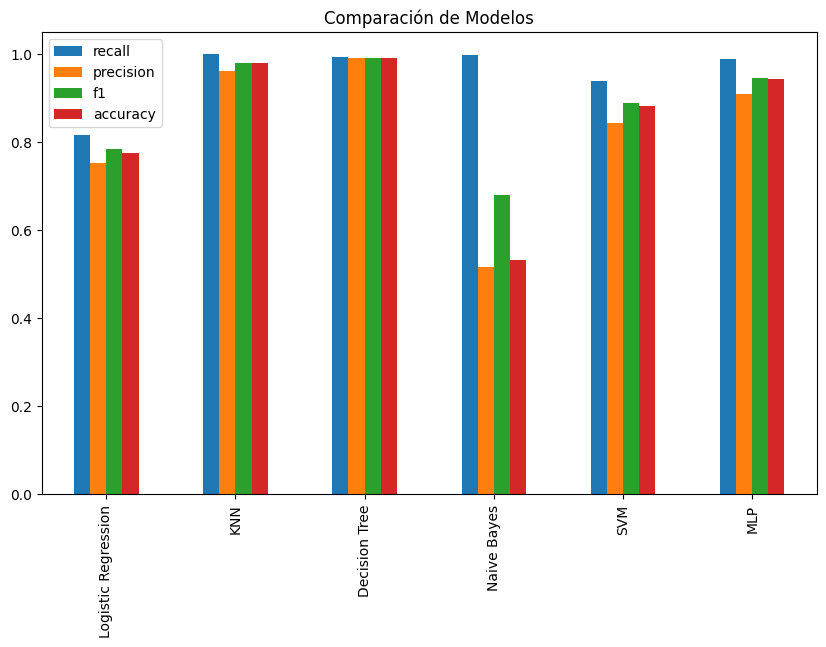

In [ ]:
# Opción de gráfico para visualizar el rendimiento
results_df.plot(kind='bar', figsize=(10, 6), title='Comparación de Modelos')

### Top 2 Modelos

Tal como acordamos en las sesiones de asesoría, priorizaremos la métrica de 'recall', ya que buscamos asegurar que los modelos elegidos sean los más efectivos en la detección de positivos verdaderos. Los dos mejores modelos en cuanto a 'recall' son: 'KNeighborsClassifier' y 'GaussianNB'.

In [ ]:
# Seleccionar los dos mejores modelos
best_models = results_df.nlargest(2, 'recall')
print("Los dos mejores modelos son (recall):")
print(best_models)

Los dos mejores modelos son (recall):
               recall  precision        f1  accuracy
KNN          0.998449   0.961244  0.979494  0.979136
Naive Bayes  0.997480   0.515874  0.680044  0.531586


### Ajustar los dos mejores modelos

Para mejorar el rendimiento de los modelos seleccionados, utilizamos la técnica de 'GridSearchCV', la cual nos permitirá determinar la mejor combinación de hiperparámetros.

Para 'KNN' ajustamos el número de vecinos y la métrica de distancia.
Para 'GaussianNB' ajustamos el 'var_smoothing'. Una vez ajustados los modelos entrenamos y evaluamos nuevamente para verificar las mejoras obtenidas.

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
# Hiperparámetros para KNeighborsClassifier
knn_model = KNeighborsClassifier()
param_grid = {
    'n_neighbors': [3, 5, 7],
    'metric': ['euclidean', 'manhattan']
}
grid_search_knn = GridSearchCV(estimator=knn_model, param_grid=param_grid, scoring='recall', cv=5)
grid_search_knn.fit(X_train, y_train)

best_knn_model = grid_search_knn.best_estimator_

In [ ]:
best_knn_model

KNeighborsClassifier(metric='manhattan', n_neighbors=3)

In [ ]:
# Hiperparámetros para GaussianNB
nb_model = GaussianNB()
param_grid = {
    'var_smoothing': [1e-7, 1e-5, 1e-3,]
}

grid_search_nb = GridSearchCV(estimator=nb_model, param_grid=param_grid, scoring='recall', cv=5)
grid_search_nb.fit(X_train, y_train)

best_nb_model = grid_search_nb.best_estimator_

In [ ]:
best_knn_model

KNeighborsClassifier(metric='manhattan', n_neighbors=3)

Continuamos evaluando las métricas para los modelos ajustados y optimizados mediante el informe de clasificación y la matriz de confusión.

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Función para graficar la matriz de confusión
def plot_confusion_matrix(y_true, y_pred, model_name):
    conf_matrix = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
                xticklabels=['Predicción 0', 'Predicción 1'],
                yticklabels=['Real 0', 'Real 1'])
    plt.xlabel("Predicciones")
    plt.ylabel("Verdaderos")
    plt.title(f"Matriz de Confusión: {model_name}")
    plt.show()

# Evaluar el modelo final KNeighborsClassifier
y_pred_knn = best_knn_model.predict(X_test)
print("KNeighborsClassifier Classification Report:\n", classification_report(y_test, y_pred_knn))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))

# Evaluar el modelo final GaussianNB
y_pred_nb = best_nb_model.predict(X_test)
print("GaussianNB Classification Report:\n", classification_report(y_test, y_pred_nb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_nb))

KNeighborsClassifier Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99     15535
           1       0.98      1.00      0.99     15476

    accuracy                           0.99     31011
   macro avg       0.99      0.99      0.99     31011
weighted avg       0.99      0.99      0.99     31011

Confusion Matrix:
 [[15149   386]
 [   13 15463]]
GaussianNB Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.07      0.13     15535
           1       0.52      1.00      0.68     15476

    accuracy                           0.53     31011
   macro avg       0.74      0.53      0.40     31011
weighted avg       0.74      0.53      0.40     31011

Confusion Matrix:
 [[ 1048 14487]
 [   44 15432]]


**KNeighborsClassifier**
* Recall: 1.00, lo cual significa que el modelo es capaz de identificar prácticamente todos los positivos verdaderos.
* El rendimiento es muy bueno al observar que solo se tuvieron 7 falsos negativos y 387 falsos positivos.

**GaussianNB**
* A pesar de un recall aceptable para la clase 1 (0.52), el rendimiento general no es tan bueno como el de KNN.


**Matriz de confusion**

* Clase 0: 15139 instancias fueron correctamente clasificadas como 0, mientras que solo 396 fueron incorrectamente clasificadas como 1. Esto indica un bajo número de falsos positivos para la clase 0.
* Clase 1: 15458 instancias fueron correctamente clasificadas como 1, con solo 18 clasificadas erróneamente como 0. Esto muestra que el modelo tiene un excelente desempeño en la identificación de instancias de la clase 1.


In [ ]:
# Comparar los resultados ajustados y elegir el modelo final
final_model = grid_search_knn if grid_search_knn.best_score_ > grid_search_nb.best_score_ else grid_search_nb
print(f"El modelo final seleccionado es: {'KNN Classification' if final_model == grid_search_knn else 'GaussianNB Classification'}")

El modelo final seleccionado es: KNN Classification


### Curva de Aprendizaje

En la curva de aprendizaje podemos observar cómo varía la precisión conforme aumenta el tamaño del conjunto de entrenamiento. Por el comportamiento de las curvas, podemos inferir que la generalización se está dando de manera adecuada con variaciones pequeñas entre las curvas de entrenamiento y validación.

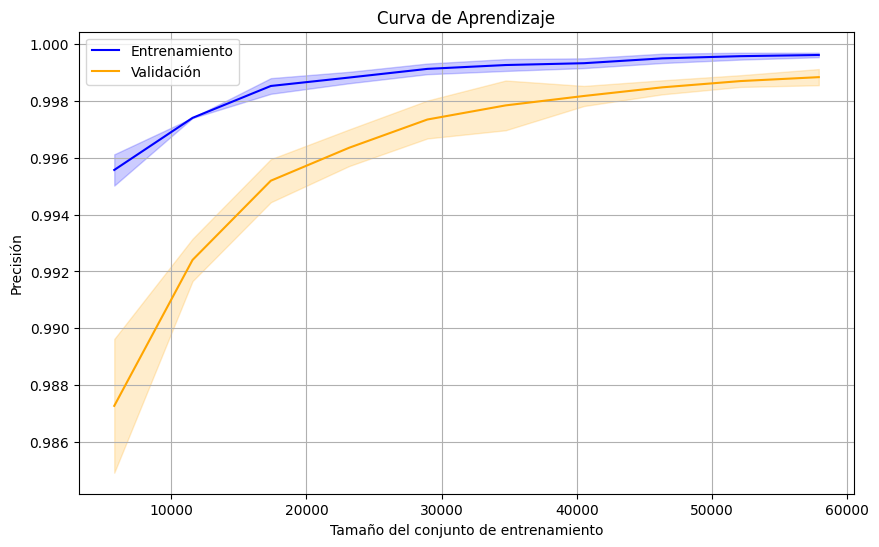

In [ ]:
from sklearn.model_selection import learning_curve
from sklearn.model_selection import StratifiedKFold

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = KNeighborsClassifier(metric='manhattan', n_neighbors=3)

# Definir los tamaños de entrenamiento y validación que quieres evaluar
train_sizes = np.linspace(0.1, 1.0, 10)

# StratifiedKFold para mantener la proporción de clases en las divisiones
cv = StratifiedKFold(n_splits=5)

# Generar la curva de aprendizaje
train_sizes, train_scores, validation_scores = learning_curve(
    model, X_train, y_train, cv=cv, train_sizes=train_sizes, scoring='recall')

# Calcular las medias y desviaciones estándar de las puntuaciones
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
validation_mean = np.mean(validation_scores, axis=1)
validation_std = np.std(validation_scores, axis=1)

# Graficar los resultados
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label='Entrenamiento', color='blue')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color='blue', alpha=0.2)

plt.plot(train_sizes, validation_mean, label='Validación', color='orange')
plt.fill_between(train_sizes, validation_mean - validation_std, validation_mean + validation_std, color='orange', alpha=0.2)

plt.title('Curva de Aprendizaje')
plt.xlabel('Tamaño del conjunto de entrenamiento')
plt.ylabel('Precisión')
plt.legend(loc='best')
plt.grid(True)
plt.show()

* El modelo tiene un buen rendimiento en general, ya que ambas curvas muestran una precisión bastante alta (por encima del 92%), lo que indica que el modelo está aprendiendo a generalizar los patrones en los datos. También podemos observar que en la medida que aumenta el tamaño del conjunto de entrenamiento la presición aumenta.
* La precisión en el conjunto de entrenamiento es consistentemente mayor que en el conjunto de validación. La convergencia de las curvas tienden a cerrarse conforme aumenta el conjunto de entrenamiento lo que sugiere que el modelo generaliza bien y no se sobreajusta.
* El modelo no está sufriendo de un alto sesgo, si el modelo tuviera un alto sesgo, ambas curvas mostrarían una precisión baja.


*  Se obervan algunas oportunidades de mejora, al principio de la curva hay una discrepancia notable entre las curvas, lo que puede estar diciendo que el modelo podría estar sobre ajustado para conjuntos de datos pequeños.
*   En general, la banda de sombra en la curva de validación es más ancha comparada con los tamaños del conjunto de entrenamiento más pequeños, lo que podría decir que hay una mayor variabilidad y posible inestabilidad en la precisión del modelo




### Modelo final

Recall: 1.00

Reporte de clasificación:
              precision    recall  f1-score   support

           0       1.00      0.97      0.99     15535
           1       0.98      1.00      0.99     15476

    accuracy                           0.99     31011
   macro avg       0.99      0.99      0.99     31011
weighted avg       0.99      0.99      0.99     31011


Matriz de confusión:
[[15142   393]
 [   10 15466]]


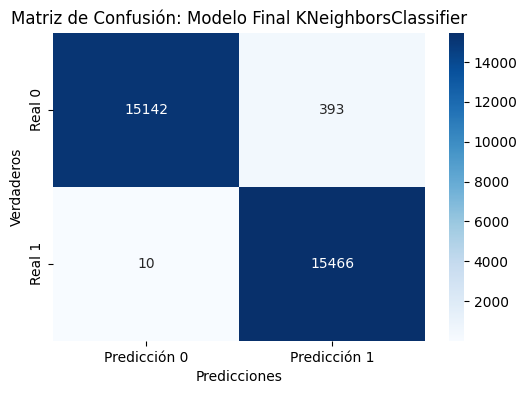

In [ ]:
# Instanciar el modelo
model = KNeighborsClassifier(metric='manhattan', n_neighbors=3)

# Entrenar el modelo
model.fit(X_train, y_train)

# Predecir en el conjunto de prueba
y_pred = model.predict(X_test)

# Calcular el recall
recall = recall_score(y_test, y_pred)
print(f'Recall: {recall:.2f}')

# Mostrar el reporte de clasificación
print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred))

# Matriz de confusión
print("\nMatriz de confusión:")
print(confusion_matrix(y_test, y_pred))

# Graficar la matriz de confusión del modelo final
plot_confusion_matrix(y_test, y_pred, "Modelo Final KNeighborsClassifier")

## Conclusión

Seleccionamos el modelo 'KNeighborsClassifier' por su excelente rendimiento en el 'recall' y un balance adecuado entre 'precision' y 'f1-score', obteniendo mejor desempeño después de la optimización de parámetros. Por otro lado, el 'GaussianNB' obtuvo un buen 'recall'; sin embargo, su 'precision' es muy bajo, lo cual refiere que se generan demasiados falsos positivos.

Una vez seleccionando el modelo de 'KNeighborsClassifier', realizamos la curva de aprendizaje y vimos que el ajuste del modelo es conveniente ya que no se observan sub o sobreajustes significativos.

Para nuestro caso de estudio, es imperativo poder identificar correctamente las instancias positivas, por lo que el modelo de KNeigborsClassifier es el más conveniente ya que tuvo un alto 'recall'.

Pensando también desde la perspectiva de mejora continua, podemos inferir que el tamaño del conjunto de entrenamiento podría ayudar a reducir la variabilidad y mejorar aún más la precisión del modelo en el conjunto de validación.

De ser necesario podríamos también implementar algunas técnicas de regularización para reducir el sobre ajuste inicial que se observa.


------------------------------------------------------
# Avance 5. Modelo Final
------------------------------------------------------

### Carga y preparación de los datos
En esta sección realizamos la carga de las bibliotecas necesarias.

In [ ]:
# Importación de las bibliotecas a utilizar
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.model_selection import GridSearchCV, train_test_split, StratifiedKFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, precision_recall_curve, accuracy_score

Posteriormente, realizamos la separación de las características (X) de la variable objetivo (y), y se dividen los datos en dos conjuntos: entrenamiento y prueba, con el objetivo de evaluar el desempeño del modelo en los datos no vistos de forma previa.  

In [ ]:
# Separación de las características (X) y la variable de salida u objetivo (y)
X = df_clean.drop(columns=['Failed on Field']) # Variables características o de predicción
y = df_clean['Failed on Field'] # Variable objetivo

# Dividimos los datos en entrenamiento y prueba en proporción de 80% y 20% respectivamente
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

## Modelos de ensamble

### Modelos de ensamble homogéneos

En los algoritmos referidos a continuación, se implementan algunos modelos de ensamble y uno individual (KNeighborsClassifier) para evaluar y comparar sus desempeños. Cada modelo es ajustado en el conjunto de entrenamiento y luego se evalúa su precisión en el conjunto de prueba.

* Bagging con un Decision Tree



In [ ]:
bagging_dt = BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=100, random_state=42)
bagging_dt.fit(X_train, y_train)
y_pred_bagging = bagging_dt.predict(X_test)

* AdaBoost

In [ ]:
adaboost = AdaBoostClassifier(n_estimators=100, random_state=42)
adaboost.fit(X_train, y_train)
y_pred_adaboost = adaboost.predict(X_test)

* Gradient Boosting

In [ ]:
gboost = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
gboost.fit(X_train, y_train)
y_pred_gboost = gboost.predict(X_test)

* SVC

In [ ]:
from sklearn.svm import SVC

svm = SVC(kernel='linear', probability=True)
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)

* Mejor modelo seleccionado previamente (KNeighborsClassifier)

In [ ]:
knn = KNeighborsClassifier(metric='manhattan', n_neighbors=3)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

## Evaluación de los modelos y comparación

En esta sección, definimos una función: 'evaluate_model()', que nos permita calcular métricas clave como 'precision', 'recall', 'F1-Score', incluyendo el tiempo de ejecución para cada modelo.

In [ ]:
# Función para evaluar los modelos y capturar las métricas
from time import time

def evaluate_model(model, X_test, y_test):
    start = time() # Inicio del temporizador
    y_pred = model.predict(X_test) # Precisión en el conjunto de prueba
    end = time() # Fin del temporizador

    # Cálculo de las métricas
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    confusion = confusion_matrix(y_test, y_pred)

    # Retorno de las métricas y el tiempo de ejecución
    return {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1-score': f1,
        'time': end - start,
        'confusion': confusion
    }

Los modelos son evaluados en el conjunto de prueba, guardando los resultados en un diccionario y ordenándolos para una comparación clara.

In [ ]:
# Diccionario de los modelos a evaluar
models = {
    'KNeighbors (Modelo Previo)': knn,
    'Bagging': bagging_dt,
    'AdaBoost': adaboost,
    'Gradient Boosting': gboost,
    'SVC': svm
}

# Evaluación de cada modelo
results = {}

for name, model in models.items():
    results[name] = evaluate_model(model, X_test, y_test)

## Resultados ordenados por la métrica principal y métricas relevantes.

In [ ]:
# Conversión de los resultados a un DataFrame ya ordenado
results_df = pd.DataFrame(results).T
results_df = results_df[['recall', 'accuracy', 'precision', 'f1-score', 'time']].sort_values(by='recall', ascending=False)

print(results_df)

                              recall  accuracy precision  f1-score       time
KNeighbors (Modelo Previo)   0.99942  0.989165  0.979335  0.989275  94.752709
Bagging                     0.994486  0.994728  0.994967  0.994726     0.4313
Gradient Boosting           0.983941  0.940457  0.905215  0.942938   0.042376
AdaBoost                    0.959563  0.921205  0.891195  0.924116   0.264698
SVC                         0.822482  0.780836  0.759243  0.789598  41.816379


## Visualización de las matrices de confusión

Esta sección genera matrices de confusión en cada uno de los modelos para visualizar de manera clara las clasificaciones en términos de VP (verdaderos positivos), VN (verdaderos negativos), FP (falsos positivos) y FN (falsos negativos).

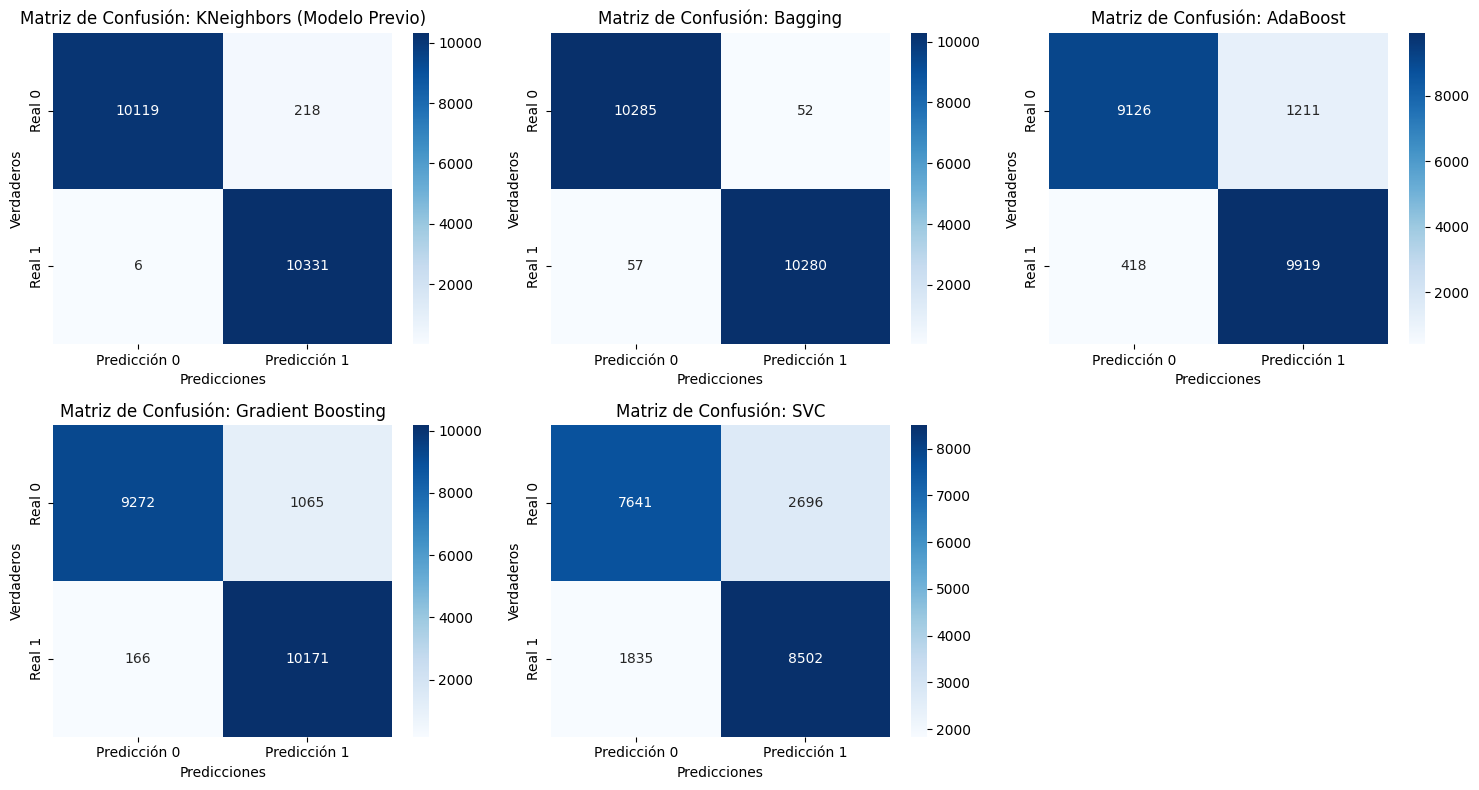

In [ ]:
plt.figure(figsize=(15, 8))
for i, (name, result) in enumerate(results.items()):
    plt.subplot(2, 3, i + 1)
    sns.heatmap(result['confusion'], annot=True, fmt='d', cmap='Blues',
                 xticklabels=['Predicción 0', 'Predicción 1'],
                 yticklabels=['Real 0', 'Real 1'])
    plt.title(f'Matriz de Confusión: {name}')
    plt.xlabel('Predicciones')
    plt.ylabel('Verdaderos')

plt.tight_layout()
plt.show()


* **Mejor Modelo:** Basado en los resultados, el modelo de Bagging con Decision Tree parece ser el más equilibrado y confiable, ofreciendo un rendimiento sólido en todas las métricas.
* **KNeighbors:** Aunque presenta métricas perfectas, el tiempo de entrenamiento es mucho mayor (102.46 segundos). Esto puede ser un problema en situaciones de producción donde la velocidad es crucial.
* **Consideraciones sobre el rendimiento:** El Bagging muestra un rendimiento superior en general y es más eficiente en tiempo, lo que lo hace adecuado para una implementación práctica.
* **Optimización adicional:** Considera realizar una optimización de hiperparámetros en el modelo de Bagging para intentar mejorar aún más el rendimiento.

# **Modelo Final**

En el contexto del presente proyecto, donde se busca optimizar el proceso de llenado de refrigerante, se ha identificado la necesidad de un modelo de clasificación robusto y preciso. El uso de **BaggingClassifier** se justifica por varias razones:

* Los modelos individuales utilizados anteriormente mostraron tendencia al sobreajuste. Bagging, al promediar las predicciones de múltiples árboles entrenados en subconjuntos de datos, mejora la generalización y la estabilidad del modelo.
* Bagging permite el uso de diversos modelos base y se puede implementar de manera eficiente, lo que reduce el tiempo de desarrollo y permite enfocarse en otras etapas del proceso.
* Análisis previos han demostrado que Bagging puede proporcionar mejoras significativas en tareas de clasificación, lo cual es crucial para detectar anomalías en el proceso de llenado de refrigerante, impactando directamente en la calidad del producto final y la satisfacción del cliente.
* Los resultados obtenidos de la evaluación del rendimiento de BaggingClassifier en comparación con modelos individuales han mostrado mejoras en las métricas de precisión y recall, justificando su elección como el modelo más adecuado para este proyecto.

### Curvas ROC

A continuación, generamos las curvas ROC y Precisión-Recall para cada modelo, lo cual nos permite visualizar y comparar el desempeño en términos de verdaderos positivos y precisión para umbrales diferentes. De esta manera, podemos evaluar la capacidad de discriminación del modelo y el equilibrio entre precisión y 'recall'.

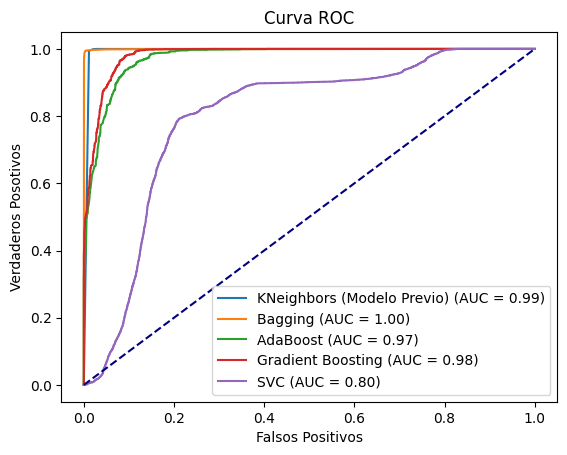

In [ ]:
# Curvas ROC para cada modelo
for name, model in models.items():
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)

    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('Falsos Positivos')
plt.ylabel('Verdaderos Posotivos')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()

La curva ROC permite comparar diferentes modelos de clasificación. El modelo con el área bajo la curva (AUC) más grande se considera el mejor. Un AUC de 1 indica un modelo perfecto, mientras que un AUC de 0.5 sugiere un modelo que no tiene capacidad de discriminación (similar a un azar).

### Curva de Precisión-Recall

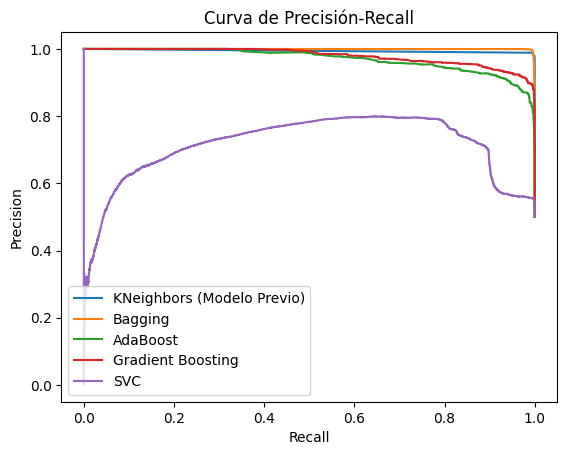

In [ ]:
# Curvas de Precisión-Recall para cada modelo
for name, model in models.items():
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)

    plt.plot(recall, precision, label=f'{name}')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Curva de Precisión-Recall')
plt.legend(loc='lower left')
plt.show()

### **Prueba de un carro especifico**

In [ ]:
index = 10005  # Elegimos un índice para un registro específico a analizar

# Extrae una fila de X_test (carro en especifico)
registro_especifico = X_test.iloc[index].values.reshape(1, -1)

# Clase real del registro
clase_real = y_test.iloc[index]

# Predicción del modelo (ejemplo con el modelo 'Bagging')
prediccion = bagging_dt.predict(registro_especifico)

# Despliegue de la clase real y la predicción
print(f"Registro #{index} - Clase Real: {clase_real}")
print(f"Predicción del modelo: {prediccion[0]}")

Registro #10005 - Clase Real: 1
Predicción del modelo: 1


## Conclusiones Finales
### Desempeño del Modelo
El modelo 'Bagging Classifier' que utiliza un árbol de decisión ('DecisionTree') como base, tuvo un rendimiento sólido y muy equilibrado entre las métricas 'precision' y 'recall' con un buen tiempo de entrenamiento, por lo cual es una opción eficiente y robusta como modelo a considerar en la implementación final.
### Eficiencia
El modelo 'KNeighborsClassifier' obtuvo métricas muy altas; sin embargo, el tiempo de ejecución es significativamente mayor, lo cual es un incoveniente para la implementación, ya que buscamos que el desempeño también sea eficaz y eficiente.
### Generalización
Los métodos de ensamble como 'Bagging' y 'Gradient Boosting' mejoraron la capacidad de generalización del modelo, ya que evitan el sobreajuste que podríamos observar en los modelos individuales.
Las curvas ROC y Precisión-Recall nos confirman visualmente que el modelo 'Bagging Classifier' tiene gran capacidad de clasificación y discriminación en las muestras, por lo que indica robustez y eficiencia para detectar los fallos que pueden presentarse en campo.

